# Part2_peijin

In [1]:
import pandas as pd
import numpy as np
from plotnine import*
import seaborn as sns
from statistics import *
import os
import matplotlib.pyplot as plt

In [2]:
##PART 2
##Q1 Using the original data from the us_states.csv file, find the state that has recorded the highest number of new cases per 100,000 residents between September 1 and September 28, inclusive5 . Display the state and the number of new cases per 100,000 residents.
us_states=pd.read_csv("us_states.csv") ##read the us_states.csv file as a Pandas DataFrame
us_states.head(4)##Print the first 5 rows in the dataset 

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0


In [3]:
state_ACS_data=pd.read_csv("state_ACS_data.csv")##load the data of ACS
state_ACS_data.head(4)

,state,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance
0,Alabama,1,4864680,65.713058,17.489743,48486,9.978475
1,Alaska,2,738516,61.035103,10.804469,76715,14.417467
2,Arizona,4,6946685,55.074989,16.087707,56213,10.942914
3,Arkansas,5,2990671,72.687668,17.579624,45726,9.037174


In [4]:
us_states_selec=us_states.filter(["date","state","cases"])##select the columns needed in Q1

In [5]:
us_states_selec=us_states_selec.merge(state_ACS_data,how="left",on="state")

In [6]:
us_states_selec.sort_values(by=["state","date"])## sort the data and look into the data
us_states_selec.head(4)

,date,state,cases,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance
0,2020-01-21,Washington,1,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661
1,2020-01-22,Washington,1,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661
2,2020-01-23,Washington,1,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661
3,2020-01-24,Illinois,1,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750


In [7]:
us_states_selecA=us_states_selec.loc[us_states_selec.date=="2020-08-31", :]##select the data of "2020-09-01" and form a df
us_states_selecA.head(4)##look into the data

,date,state,cases,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance
9969,2020-08-31,Alabama,126058,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475
9970,2020-08-31,Alaska,6075,2.0,738516.0,61.035103,10.804469,76715.0,14.417467
9971,2020-08-31,Arizona,201866,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914
9972,2020-08-31,Arkansas,61224,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174


In [8]:
us_states_selecB=us_states_selec.loc[us_states_selec.date=="2020-09-28", :]##select the data of "2020-09-28" and form a df
us_states_selecB.head(4)##look into the data

,date,state,cases,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance
11509,2020-09-28,Alabama,152983,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475
11510,2020-09-28,Alaska,8477,2.0,738516.0,61.035103,10.804469,76715.0,14.417467
11511,2020-09-28,Arizona,217513,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914
11512,2020-09-28,Arkansas,82049,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174


In [9]:
us_states_selecC=us_states_selecA.merge(us_states_selecB,how="outer",on="state")
us_states_selecC=us_states_selecC.rename(columns={"cases_x":"cases_0831","cases_y":"cases_0928","date_x":"date_0831","date_y":"date_0928","State_Population_x":"State_Population"})##rename the columns 
us_states_selecC.head(4)##look into the data 

,date_0831,state,cases_0831,State_FIPS_x,State_Population,Pct_White_Non_Hispanic_x,Pct_Population_in_Poverty_x,Median_Household_Income_x,Pct_Population_No_Health_Insurance_x,date_0928,cases_0928,State_FIPS_y,State_Population_y,Pct_White_Non_Hispanic_y,Pct_Population_in_Poverty_y,Median_Household_Income_y,Pct_Population_No_Health_Insurance_y
0,2020-08-31,Alabama,126058,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,2020-09-28,152983,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475
1,2020-08-31,Alaska,6075,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,2020-09-28,8477,2.0,738516.0,61.035103,10.804469,76715.0,14.417467
2,2020-08-31,Arizona,201866,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914,2020-09-28,217513,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914
3,2020-08-31,Arkansas,61224,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,2020-09-28,82049,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174


In [10]:
us_states_selecC["diff_0831_0928"]=us_states_selecC["cases_0928"]-us_states_selecC["cases_0831"]
us_states_selecC["new_cases_per_100000_residents"]=us_states_selecC["diff_0831_0928"]/us_states_selecC["State_Population"]*100000
us_states_selecC.head(4)##look into the data 

,date_0831,state,cases_0831,State_FIPS_x,State_Population,Pct_White_Non_Hispanic_x,Pct_Population_in_Poverty_x,Median_Household_Income_x,Pct_Population_No_Health_Insurance_x,date_0928,cases_0928,State_FIPS_y,State_Population_y,Pct_White_Non_Hispanic_y,Pct_Population_in_Poverty_y,Median_Household_Income_y,Pct_Population_No_Health_Insurance_y,diff_0831_0928,new_cases_per_100000_residents
0,2020-08-31,Alabama,126058,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,2020-09-28,152983,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,26925,553.479366
1,2020-08-31,Alaska,6075,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,2020-09-28,8477,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,2402,325.246846
2,2020-08-31,Arizona,201866,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914,2020-09-28,217513,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914,15647,225.244127
3,2020-08-31,Arkansas,61224,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,2020-09-28,82049,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,20825,696.332027


In [11]:
us_states_selecC.sort_values("new_cases_per_100000_residents",ascending=False).head(3)## sort the data and look into the highest number of new cases per 100,000 residents between September 1 and September 28
##North Dakota has the highest number of new cases per 100,000 residents between September 1 and September 28, with the new_cases_per_100000_residents of 1218.557274

,date_0831,state,cases_0831,State_FIPS_x,State_Population,Pct_White_Non_Hispanic_x,Pct_Population_in_Poverty_x,Median_Household_Income_x,Pct_Population_No_Health_Insurance_x,date_0928,cases_0928,State_FIPS_y,State_Population_y,Pct_White_Non_Hispanic_y,Pct_Population_in_Poverty_y,Median_Household_Income_y,Pct_Population_No_Health_Insurance_y,diff_0831_0928,new_cases_per_100000_residents
35,2020-08-31,North Dakota,11820,38.0,752201.0,85.014112,10.898887,63473.0,7.400430,2020-09-28,20986,38.0,752201.0,85.014112,10.898887,63473.0,7.400430,9166,1218.557274
44,2020-08-31,South Dakota,13509,46.0,864289.0,82.242167,13.551462,56499.0,9.386754,2020-09-28,21738,46.0,864289.0,82.242167,13.551462,56499.0,9.386754,8229,952.112083
53,2020-08-31,Wisconsin,80733,55.0,5778394.0,81.528501,11.872685,59209.0,5.773083,2020-09-28,124320,55.0,5778394.0,81.528501,11.872685,59209.0,5.773083,43587,754.309935


In [12]:
##Display the state and the number of new cases per 100,000 residents
us_states_selecC=us_states_selecC.filter(["state","date_0831","cases_0831","date_0928","cases_0928","diff_0831_0928","new_cases_per_100000_residents"])##rearrange the columns 
us_states_selecC.head(4)

,state,date_0831,cases_0831,date_0928,cases_0928,diff_0831_0928,new_cases_per_100000_residents
0,Alabama,2020-08-31,126058,2020-09-28,152983,26925,553.479366
1,Alaska,2020-08-31,6075,2020-09-28,8477,2402,325.246846
2,Arizona,2020-08-31,201866,2020-09-28,217513,15647,225.244127
3,Arkansas,2020-08-31,61224,2020-09-28,82049,20825,696.332027


In [13]:
us_states_selecC=us_states_selecC.drop(columns=["date_0831","cases_0831","date_0928","cases_0928"])##drop colums 
us_states_selecC.head(4)##Display the state and the number of new cases per 100,000 residents

,state,diff_0831_0928,new_cases_per_100000_residents
0,Alabama,26925,553.479366
1,Alaska,2402,325.246846
2,Arizona,15647,225.244127
3,Arkansas,20825,696.332027


In [14]:
##Q2 Using the original data from the us_states.csv file, create new variables equal to the number of daily new cases and deaths.6 Display summary statistics for these two variables
us_states_Q2=us_states##load the data and look into it 
us_states_Q2.head(4)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0


In [15]:
us_states_Q2=us_states_Q2.sort_values(by=["state","date"])## sort the data and look into the data
us_states_Q2.head(4)

,date,state,fips,cases,deaths
586,2020-03-13,Alabama,1,6,0
637,2020-03-14,Alabama,1,12,0
689,2020-03-15,Alabama,1,23,0
742,2020-03-16,Alabama,1,29,0


In [16]:
us_states_Q2["daily_new_cases"]=us_states_Q2.groupby(['state'])[['cases']].diff()##creat a new df of "daily_new_cases"
us_states_Q2["daily_new_deaths"]=us_states_Q2.groupby(['state'])[['deaths']].diff()##creat a new df of "daily_new_deaths"
us_states_Q2.fillna(0)##fill the NaN with 0

##Display summary statistics for these two variables.
us_states_Q2[['daily_new_cases','daily_new_deaths']].describe()

,daily_new_cases,daily_new_deaths
count,11509.000000,11509.000000
mean,623.544009,17.806934
std,1296.165924,55.867778
min,-7757.000000,-102.000000
25%,38.000000,0.000000
50%,225.000000,4.000000
75%,688.000000,15.000000
max,22276.000000,1877.000000


In [17]:
##Q3 Pick a state that had a stay at home order that expired (before September 28) and generate a plot of daily new cases. Add vertical lines corresponding to the start and end dates of the stay-at-home order. Comment briefly on any patterns you notice.
all_merge_2=pd.read_csv("all_merge_2.csv") ##read the all_merge_2.csv file as a Pandas DataFrame
all_merge_2.head(3)##check out the data 

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,effective,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,n_days
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,15.2983,0.2501,1,27
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,3/28/2020 - 4/24/2020,Yes,2020-09-28,2,8477,52,0.8477,0.0052,0,28
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,3/31/2020 - 5/15/2020,Yes,2020-09-28,4,217513,5624,21.7513,0.5624,0,46


In [18]:
##pick the state:Alabama( accoring to "all_merge_2", it had a stay at home order that expired)
all_merge_2.loc[all_merge_2.state=="Alabama"]##look up the data of "Alabama"
##the start and end dates of the stay-at-home order is 4/4/2020 - 4/30/2020

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,effective,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,n_days
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,15.2983,0.2501,1,27


In [19]:
us_states_Alabama=us_states.loc[us_states.state=="Alabama"]##select the data of "Alabama"
us_states_Alabama##look into the data

,date,state,fips,cases,deaths
586,2020-03-13,Alabama,1,6,0
637,2020-03-14,Alabama,1,12,0
689,2020-03-15,Alabama,1,23,0
742,2020-03-16,Alabama,1,29,0
795,2020-03-17,Alabama,1,39,0
...,...,...,...,...,...
11289,2020-09-24,Alabama,1,148206,2506
11344,2020-09-25,Alabama,1,150658,2491
11399,2020-09-26,Alabama,1,151591,2501
11454,2020-09-27,Alabama,1,152321,2502


In [20]:
us_states_Alabama["daily_new_cases"]=us_states_Alabama["cases"].diff()##create a new column of "daily_new_cases" of Alabama
us_states_Alabama=us_states_Alabama.fillna(0)##fill the NaN with 0
us_states_Alabama.head(4)## look into the data

<ipython-input-20-1a2f8b61e8fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,state,fips,cases,deaths,daily_new_cases
586,2020-03-13,Alabama,1,6,0,0.0
637,2020-03-14,Alabama,1,12,0,6.0
689,2020-03-15,Alabama,1,23,0,11.0
742,2020-03-16,Alabama,1,29,0,6.0


In [21]:
us_states_Alabama.loc[us_states_Alabama.date=="2020-04-04"]##look up the data of "2020-04-04"

,date,state,fips,cases,deaths,daily_new_cases
1774,2020-04-04,Alabama,1,1632,44,97.0


In [22]:
us_states_Alabama.loc[us_states_Alabama.date=="2020-04-30"]##look up the data of "2020-04-30"

,date,state,fips,cases,deaths,daily_new_cases
3204,2020-04-30,Alabama,1,7068,272,143.0


In [23]:
us_states_Alabama["date"]=pd.to_datetime(us_states_Alabama.date)

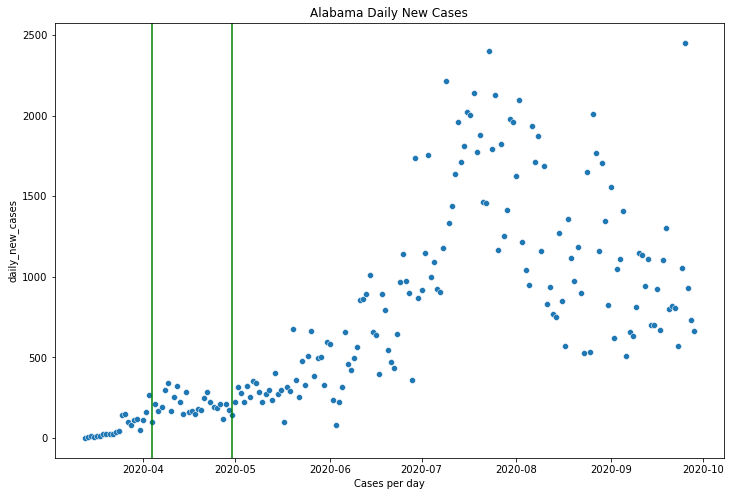

In [24]:
plt.figure(figsize=(12,8))
##draw the plot of daily new cases.
sns.scatterplot(x = 'date', y = 'daily_new_cases',data=us_states_Alabama)
plt.xlabel("Cases per day")
plt.title("Alabama Daily New Cases")
plt.axvline(x=pd.to_datetime("2020-04-04"),ls="-",c="green")###add vertical lines corresponding to the start and end dates of the stay-at-home order.
plt.axvline(x=pd.to_datetime("2020-04-30"),ls="-",c="green")
plt.show()
##Comment:Cases per day increased more slowly during the stay-at-home order period than during other periods of the time

In [25]:
##Q4 Create a new DataFrame that contains the number of daily new cases and deaths per 100,000 residents among the states that Donald Trump won and the states that Hillary Clinton won (i.e., for a given date you should have one observation corresponding to the group of states that voted for Trump in 2016, and another corresponding to the group of states that voted for Clinton). Plot the number of daily new deaths per 100,000 over time in these two groups of states, using appropriate colors (i.e., red and blue) for the corresponding lines. Comment briefly on any patterns you notice.
election_results=pd.read_csv("2016_election_results.csv")##load the election results data
election_results.head(4)

,state,trump_2016_vote_share,trump_won
0,Alabama,62.10%,Yes
1,Alaska,51.30%,Yes
2,Arizona,48.10%,Yes
3,Arkansas,60.60%,Yes


In [26]:
df=pd.get_dummies(election_results.trump_won)##create a dummy variable based on "trump_won"
df=df.rename(columns={"No":"Trump","Yes":"Clinton"})##rename the columns 
df.head(4)

,Trump,Clinton
0,0,1
1,0,1
2,0,1
3,0,1


In [27]:
df=pd.merge(df, election_results, left_index=True, right_index=True)
df=df.rename(columns={"state_x":"state"})##rename the columns 
df.head(4)

,Trump,Clinton,state,trump_2016_vote_share,trump_won
0,0,1,Alabama,62.10%,Yes
1,0,1,Alaska,51.30%,Yes
2,0,1,Arizona,48.10%,Yes
3,0,1,Arkansas,60.60%,Yes


In [28]:
us_states_Q4=us_states
us_states_Q4.head(4)##create a new df for Q4

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0


In [29]:
us_states_Q4=pd.merge(us_states_Q4, df, how="left",on="state")## merge two columns 
us_states_Q4.head(4)##look into the data

,date,state,fips,cases,deaths,Trump,Clinton,trump_2016_vote_share,trump_won
0,2020-01-21,Washington,53,1,0,1.0,0.0,36.80%,No
1,2020-01-22,Washington,53,1,0,1.0,0.0,36.80%,No
2,2020-01-23,Washington,53,1,0,1.0,0.0,36.80%,No
3,2020-01-24,Illinois,17,1,0,1.0,0.0,38.40%,No


In [30]:
us_states_Q4.sort_values(by=["state","date"])## sort the data and look into the data
us_states_Q4.head(4)##look into the data

,date,state,fips,cases,deaths,Trump,Clinton,trump_2016_vote_share,trump_won
0,2020-01-21,Washington,53,1,0,1.0,0.0,36.80%,No
1,2020-01-22,Washington,53,1,0,1.0,0.0,36.80%,No
2,2020-01-23,Washington,53,1,0,1.0,0.0,36.80%,No
3,2020-01-24,Illinois,17,1,0,1.0,0.0,38.40%,No


In [31]:
us_states_Q4["daily_new_deaths"]=us_states_Q4.groupby(['state'])[['deaths']].diff()##create a new df of "daily_new_deaths"
us_states_Q4["daily_new_cases"]=us_states_Q4.groupby(['state'])[['cases']].diff()##create a new df of "daily_new_cases"
us_states_Q4.head(4)##look into the data

,date,state,fips,cases,deaths,Trump,Clinton,trump_2016_vote_share,trump_won,daily_new_deaths,daily_new_cases
0,2020-01-21,Washington,53,1,0,1.0,0.0,36.80%,No,NaN,NaN
1,2020-01-22,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0
2,2020-01-23,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0
3,2020-01-24,Illinois,17,1,0,1.0,0.0,38.40%,No,NaN,NaN


In [32]:
us_states_Q4=us_states_Q4.fillna(0)##fill the NaN with 0
us_states_Q4.head(4)##look into the data

,date,state,fips,cases,deaths,Trump,Clinton,trump_2016_vote_share,trump_won,daily_new_deaths,daily_new_cases
0,2020-01-21,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0
1,2020-01-22,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0
2,2020-01-23,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0
3,2020-01-24,Illinois,17,1,0,1.0,0.0,38.40%,No,0.0,0.0


In [33]:
us_states_Q4=us_states_Q4.merge(state_ACS_data,how="left",on="state")##add the column of "State_Population"
us_states_Q4.head()##look into the data

,date,state,fips,cases,deaths,Trump,Clinton,trump_2016_vote_share,trump_won,daily_new_deaths,daily_new_cases,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance
0,2020-01-21,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661
1,2020-01-22,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661
2,2020-01-23,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661
3,2020-01-24,Illinois,17,1,0,1.0,0.0,38.40%,No,0.0,0.0,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750
4,2020-01-24,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661


In [34]:
us_states_Q4["new_cases_per_100000_residents"]=us_states_Q4["daily_new_cases"]/us_states_Q4["State_Population"]*100000##cacluate the "new_cases_per_100000_residents"
us_states_Q4["new_deaths_per_100000_residents"]=us_states_Q4["daily_new_deaths"]/us_states_Q4["State_Population"]*100000##cacluate the "new_deaths_per_100000_residents"
us_states_Q4.head()##look into the data

,date,state,fips,cases,deaths,Trump,Clinton,trump_2016_vote_share,trump_won,daily_new_deaths,daily_new_cases,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,new_cases_per_100000_residents,new_deaths_per_100000_residents
0,2020-01-21,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,0.0,0.0
1,2020-01-22,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,0.0,0.0
2,2020-01-23,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,0.0,0.0
3,2020-01-24,Illinois,17,1,0,1.0,0.0,38.40%,No,0.0,0.0,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750,0.0,0.0
4,2020-01-24,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,0.0,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,0.0,0.0


In [35]:
us_states_Q4=us_states_Q4.merge(election_results,how="left",on="state")##merge two columns
us_states_Q4.head(4)##look into the data

,date,state,fips,cases,deaths,Trump,Clinton,trump_2016_vote_share_x,trump_won_x,daily_new_deaths,...,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,new_cases_per_100000_residents,new_deaths_per_100000_residents,trump_2016_vote_share_y,trump_won_y
0,2020-01-21,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,...,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,0.0,0.0,36.80%,No
1,2020-01-22,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,...,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,0.0,0.0,36.80%,No
2,2020-01-23,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,...,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,0.0,0.0,36.80%,No
3,2020-01-24,Illinois,17,1,0,1.0,0.0,38.40%,No,0.0,...,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750,0.0,0.0,38.40%,No


In [36]:
us_states_Q4["Trump_state"]=us_states_Q4["Trump"]*us_states_Q4["new_deaths_per_100000_residents"]##calulate the data of "new_deaths_per_100000_residents" for "Trump_state"
us_states_Q4["Clinton_state"]=us_states_Q4["Clinton"]*us_states_Q4["new_deaths_per_100000_residents"]####calulate the data of "new_deaths_per_100000_residents" for "Clinton_state"

In [37]:
us_states_Q4.head(4)##look into the data

,date,state,fips,cases,deaths,Trump,Clinton,trump_2016_vote_share_x,trump_won_x,daily_new_deaths,...,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,new_cases_per_100000_residents,new_deaths_per_100000_residents,trump_2016_vote_share_y,trump_won_y,Trump_state,Clinton_state
0,2020-01-21,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,...,69.083848,11.472417,70116.0,6.787661,0.0,0.0,36.80%,No,0.0,0.0
1,2020-01-22,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,...,69.083848,11.472417,70116.0,6.787661,0.0,0.0,36.80%,No,0.0,0.0
2,2020-01-23,Washington,53,1,0,1.0,0.0,36.80%,No,0.0,...,69.083848,11.472417,70116.0,6.787661,0.0,0.0,36.80%,No,0.0,0.0
3,2020-01-24,Illinois,17,1,0,1.0,0.0,38.40%,No,0.0,...,61.570704,13.060497,63575.0,7.344750,0.0,0.0,38.40%,No,0.0,0.0


In [38]:
us_states_Q4_1=us_states_Q4.groupby(["date"])[["Trump_state"]].sum()##add up the data of one group od states 

In [39]:
us_states_Q4_2=us_states_Q4.groupby(["date"])[["Clinton_state"]].sum()##add up the data of one group od states 

In [40]:
us_states_Q4_3=pd.merge(us_states_Q4_1, us_states_Q4_2, left_index=True, right_index=True)###merge the columns together
us_states_Q4_3.head(4)##look into the data

,Trump_state,Clinton_state
date,,
2020-01-21,0.0,0.0
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0


In [41]:
us_states_Q4_3 = us_states_Q4_3.reset_index(drop=False)##reset the index in the column 
us_states_Q4_3.head(4)##look into the data

,date,Trump_state,Clinton_state
0,2020-01-21,0.0,0.0
1,2020-01-22,0.0,0.0
2,2020-01-23,0.0,0.0
3,2020-01-24,0.0,0.0


In [42]:
us_states_Q4_3["date"]=pd.to_datetime(us_states_Q4_3.date)

<function matplotlib.pyplot.show(close=None, block=None)>

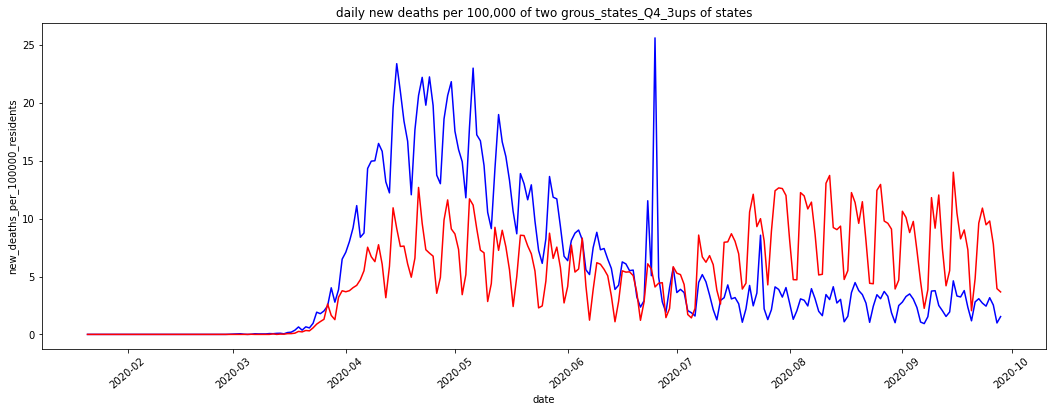

In [43]:
##Plot the number of daily new deaths per 100,000 over time in these two groups of states
plt.figure(figsize=(18,6))
plt.plot(us_states_Q4_3.loc[:,"date"],us_states_Q4_3.loc[:,"Trump_state"],color="blue")##set the line of "Trump_state"
plt.plot(us_states_Q4_3.loc[:,"date"],us_states_Q4_3.loc[:,"Clinton_state"],color="red")##set the line of "Clinton_state"
plt.xticks(rotation=40)
plt.title("daily new deaths per 100,000 of two grous_states_Q4_3ups of states")
plt.xlabel("date")##label the x axis
plt.ylabel("new_deaths_per_100000_residents")##label the y axis
plt.show## show the plot
##Comment:daily new deaths per 100,000  were higher in states that supported Trump before May, and higher in states that supported Clinton after May.